In [317]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
from io import BytesIO
from sklearn.model_selection import train_test_split

from matplotlib.collections import LineCollection

In [227]:
# spiral = theta sintheta
N = 500
theta = np.random.rand(N) * 2 * np.pi
x1 = np.sqrt(theta+np.random.rand(N)/10) * np.cos(theta)
y1 = np.sqrt(theta+np.random.rand(N)/10) * np.sin(theta)

shift = np.pi/1.5
# theta = theta+shift
x2 = np.sqrt(theta+np.random.rand(N)/10) * np.cos(theta+shift)
y2 = np.sqrt(theta+np.random.rand(N)/10) * np.sin(theta+shift)

Text(0.5, 1.0, 'Spiral Dataset')

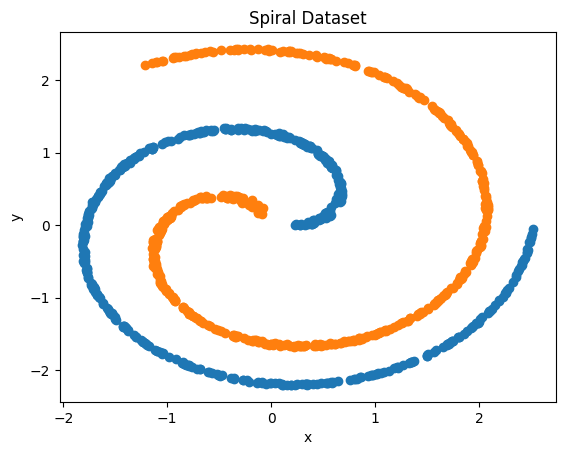

In [228]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spiral Dataset")

In [229]:
label = np.array([0]*N+[1]*N)
data = np.hstack([np.vstack([x1, y1]), np.vstack([x2, y2])]).T
# data.shape (B, S)

X_train, X_test, y_train, y_test = train_test_split(
    data, label, test_size=0.2)

In [230]:
y_train

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,

In [231]:
class Sample(Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = torch.tensor(x).to(torch.float)
        self.y = torch.tensor(y).to(torch.long)
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    def __len__(self): return self.x.shape[0]

train_sample = Sample(X_train, y_train)
test_sample = Sample(X_test, y_test)

train_sample[0][0].dtype

torch.float32

In [232]:
train_loader = DataLoader(train_sample, batch_size=32, shuffle=True)
test_loader = DataLoader(test_sample, batch_size=N, shuffle=False)

In [305]:
net = nn.Sequential(
    nn.Linear(2, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    nn.ReLU(),
    nn.Linear(5, 2),
    nn.Tanh(),
    nn.Linear(2, 2)
)

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, weight_decay=0.01)

torch.Size([107, 2])
torch.Size([93, 2])
loss: 0.77951
loss: 0.74931
loss: 0.73030
loss: 0.71800
loss: 0.70981
loss: 0.70464
loss: 0.70107
loss: 0.69876
loss: 0.69718
loss: 0.69617
torch.Size([107, 2])
torch.Size([93, 2])
loss: 0.69542
loss: 0.69478
loss: 0.69435
loss: 0.69392
loss: 0.69369
loss: 0.69335
loss: 0.69317
loss: 0.69300
loss: 0.69278
loss: 0.69260
torch.Size([107, 2])
torch.Size([93, 2])
loss: 0.69248
loss: 0.69236
loss: 0.69222
loss: 0.69209
loss: 0.69189
loss: 0.69178
loss: 0.69165
loss: 0.69156
loss: 0.69137
loss: 0.69126
torch.Size([107, 2])
torch.Size([93, 2])
loss: 0.69111
loss: 0.69104
loss: 0.69093
loss: 0.69080
loss: 0.69073
loss: 0.69058
loss: 0.69043
loss: 0.69031
loss: 0.69030
loss: 0.69012
torch.Size([107, 2])
torch.Size([93, 2])
loss: 0.68999
loss: 0.68987
loss: 0.68976
loss: 0.68967
loss: 0.68960
loss: 0.68958
loss: 0.68935
loss: 0.68933
loss: 0.68919
loss: 0.68906
torch.Size([107, 2])
torch.Size([93, 2])
loss: 0.68893
loss: 0.68876
loss: 0.68870
loss: 0.6886

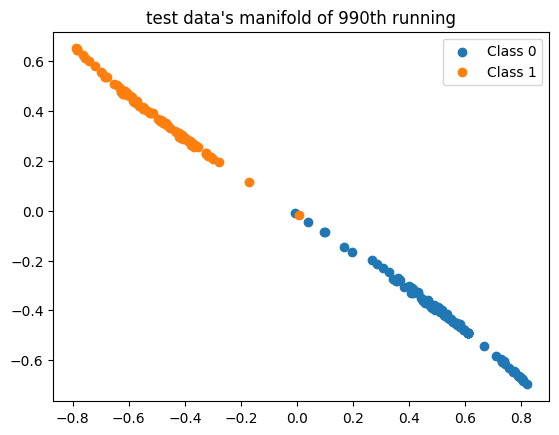

In [306]:
frames = []

fig, ax = plt.subplots()

def show_manifold_of_nth_step(net, step):
    without_last = nn.Sequential(*list(net.children())[:-1])
    _x, _y = next(iter(test_loader))

    plots = []
    ax.clear()
    ax.set_title(f"test data's manifold of {step}th running")
    for i in range(2):
        manifold = without_last(_x[_y == i])  # Select label
        print(manifold.shape)
        xx = manifold[:, 0].detach().numpy()
        yy = manifold[:, 1].detach().numpy()
        ax.scatter(xx, yy, label=f"Class {i}")
    ax.legend()

    buf = BytesIO()
    plt.savefig(buf)
    return Image.open(buf).convert("RGB")

# Training Stage
for i in range(1000):
    n = 0
    loss_accum = 0
    for (x, y) in train_loader:
        n+=1
        yhat = net(x)
        optimizer.zero_grad()
        loss = F.cross_entropy(yhat, y)
        loss_accum += loss.item()
        loss.backward()
        optimizer.step()
    if i%10 == 0:
        frames.append(show_manifold_of_nth_step(net, i))
        # plt.pause(0.1)
    print(f"loss: {loss_accum/n:.5f}")
    # loss = F.cross_entropy(input target)

In [307]:
import cv2
import numpy as np
from PIL import Image
import os

video_name = "manifold.mp4"
fps = 5  # Frames per second

width, height = frames[0].size

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
video = cv2.VideoWriter(video_name, fourcc, fps, (width, height))

# Process images and write to video
for img in frames:
    frame = np.array(img)  # Convert to numpy array
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert to BGR (OpenCV format)
    video.write(frame)

# Release the video writer
video.release()
print(f"Video saved as {video_name}")

Video saved as manifold.mp4


In [308]:
from IPython.display import Video

Video(video_name)

In [333]:
grid_x,grid_y = np.meshgrid(np.linspace(-1,1,20),np.linspace(-1,1,20))
grid = np.stack([grid_x, grid_y], axis=2)

without_last = nn.Sequential(*(list(net.children()))[:-1])
grid_after = without_last(torch.tensor(grid).to(torch.float).reshape(-1, 2)).contiguous().reshape(20, 20, 2).detach()
grid_x_after = grid_after[:, :, 0].numpy()
grid_y_after = grid_after[:, :, 1].numpy()

In [334]:
without_last
net.children

<bound method Module.children of Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=2, bias=True)
  (5): Tanh()
  (6): Linear(in_features=2, out_features=2, bias=True)
)>

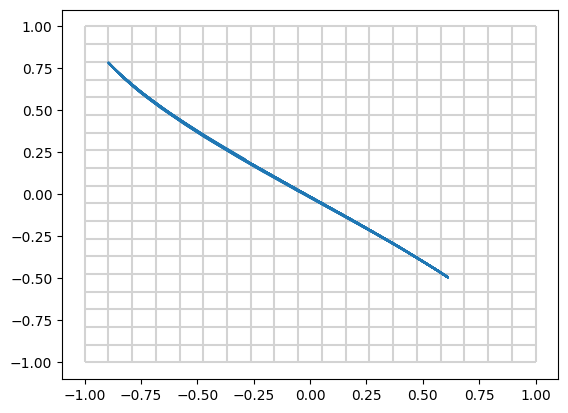

In [335]:
def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    ax.autoscale()

fig, ax = plt.subplots()

plot_grid(grid_x,grid_y, ax=ax, color="lightgrey")
plot_grid(grid_x_after, grid_y_after, ax=ax)